In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
#Einlesen der Daten
data = pd.read_csv("GW_data.csv",delimiter=",")

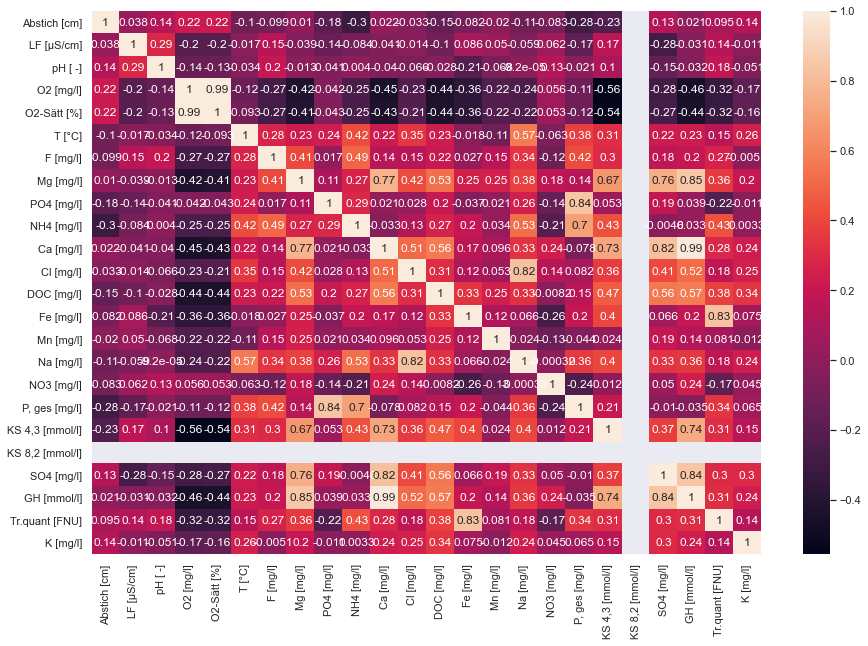

In [4]:
#Erstellen einer Korrelationsmatrix, um einen Überblick zu bekommen und geeignete Suche der Zielvariablen
correlation_matrix = data.corr()

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Auswählen von einer abhängigen Variablen und zwei geeigneten, unabhängigen Variablen :

diese sollten möglichst stark (> 0.7) mit der abhängigen Variablen korrelieren

aber weniger stark miteinander korrelieren (< 0.7)


In [5]:
#Nach dem Auswählen werden die Variablen in einen seperaten Datenframe gespeichert
#Um mit den Daten weiterarbeiten zu können müssen die NANs entfernt werden
data_new = pd.DataFrame(np.c_[data['PO4 [mg/l]'], data['NH4 [mg/l]'],data['P, ges [mg/l]']], columns = ['PO4 [mg/l]','NH4 [mg/l]','P, ges [mg/l]'])
data_new = data_new.dropna()

#der bereinigte Datenframe wird in anhängige und unabhängige Variable gesplittet
X = pd.DataFrame(np.c_[data_new['PO4 [mg/l]'], data_new['NH4 [mg/l]']], columns = ['PO4 [mg/l]','NH4 [mg/l]'])
Y = data_new['P, ges [mg/l]']

/Users/markvollmer/opt/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


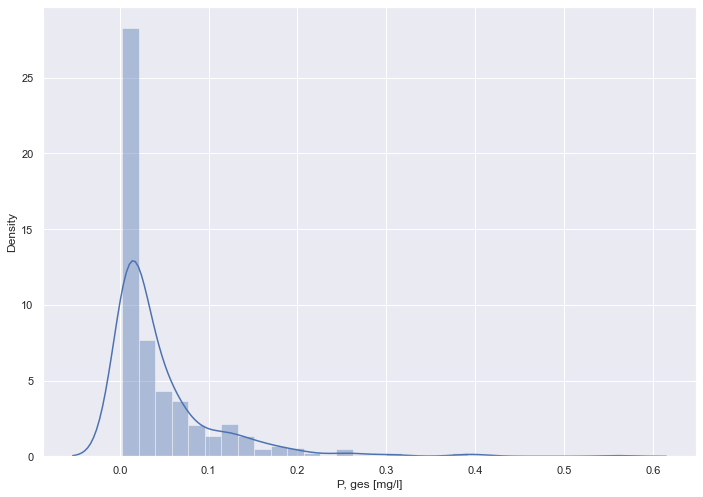

In [6]:
#Exploratory Data Analysis: 1)Um einen ersten Überblick über die Verteilung der 
#abhängingen Variable zu erhalten wird ein Distplot erstellt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['P, ges [mg/l]'], bins=30)
plt.show()

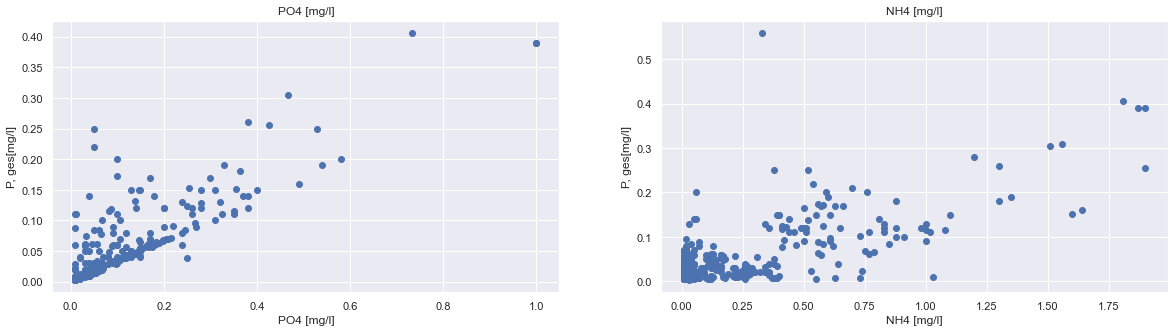

In [7]:
#Exploratory Data Analysis: 2) Wie sieht die Beziehung der ausgewählten Variablen und Phosphor aus 
plt.figure(figsize=(20, 5))

features = ['PO4 [mg/l]','NH4 [mg/l]']
target = data['P, ges [mg/l]']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('P, ges[mg/l]')

Observationen:
    linearer Anstieg des Phosporgehaltes mit steigendem P04 Gehalt 
    Trend auch bei NH4 zu sehen, mit einigen Ausreißern. 

In [8]:
#Vorbereiten der Daten für das Training des Modells
#Aufteilen der Daten in Trainings- und Testsätze
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [9]:
#Erstellung eines linearen Regressionsobjekts
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Modellbewertung für Trainingssatz
y_train_predict = lin_model.predict(X_train)

# Fehlerkriterien berechnen
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Modellbewertung für Testset
y_test_predict = lin_model.predict(X_test)

# Fehlerkriterien berechnen
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.037714913967469045
R2 score is 0.7163336039735742


The model performance for testing set
--------------------------------------
RMSE is 0.031846308160863764
R2 score is 0.8399160991719252


[Text(0.5, 0, 'y train'),
 Text(0, 0.5, 'y train predictions'),
 Text(0.5, 1.0, 'Training set: Beobachtet vs Vorhergesagt ')]

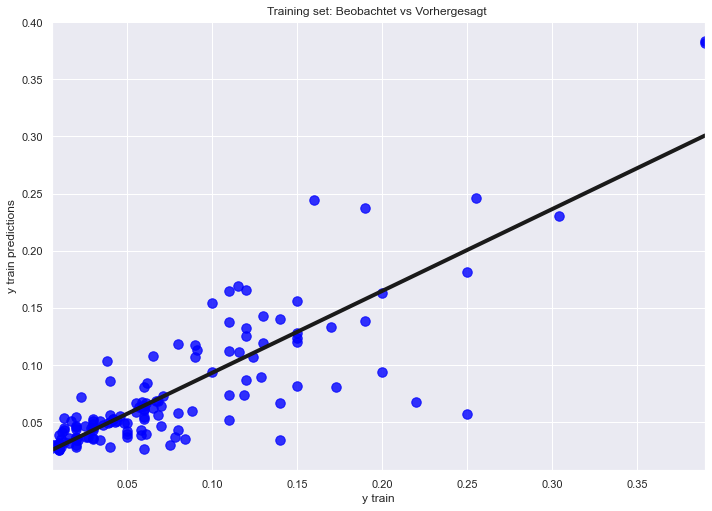

In [38]:
#Erstellen eines Regressionsplot für das Trainingsset 

ax = sns.regplot(x=Y_train, y=y_train_predict, ci = False,label='Regressionslinie',
       scatter_kws={"color":"blue","s":90},
       line_kws={"color":"k","lw":4},marker="o")
ax.set(xlabel='y train', ylabel='y train predictions', title='Training set: Beobachtet vs Vorhergesagt ')

[Text(0.5, 0, 'y test'),
 Text(0, 0.5, 'y test predictions'),
 Text(0.5, 1.0, 'Testing set: Beobachtet vs Vorhergesagt ')]

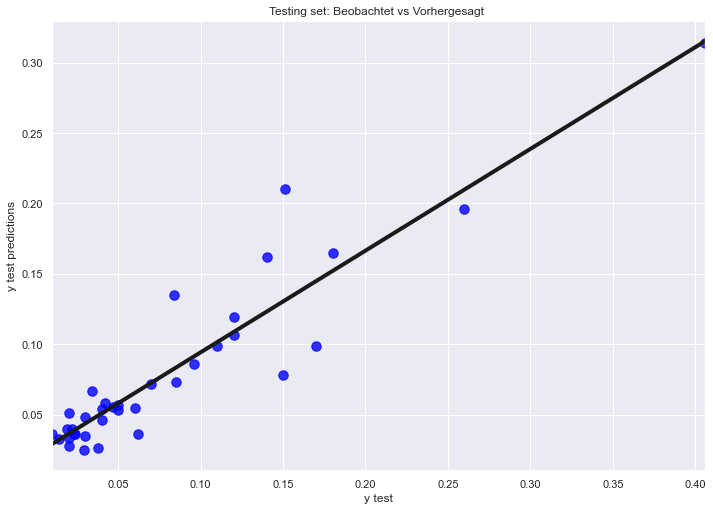

In [41]:
#Erstellen eines Regressionsplot für das Testset 
ax = sns.regplot(x=Y_test, y=y_test_predict, ci = False,label='Regressionslinie',
       scatter_kws={"color":"blue","s":90},
       line_kws={"color":"k","lw":4},marker="o")
ax.set(xlabel='y test', ylabel='y test predictions', title='Testing set: Beobachtet vs Vorhergesagt ')